Develop/Train A Multilayer Neural Netwok For MNIST Dataset
====


### Load the dataset

In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist_data = input_data.read_data_sets('/tmp/data', one_hot=True)


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


/home/vahid/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


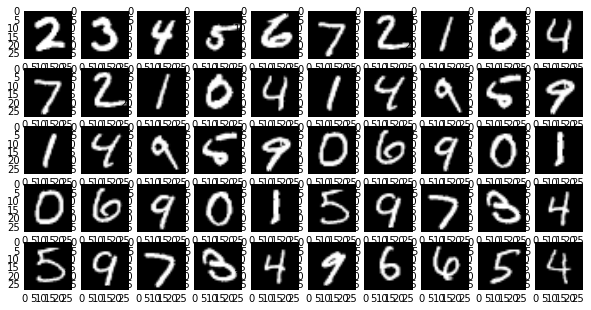

In [2]:
## Visualize a sample subset of data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

f,a = plt.subplots(5,10,figsize=(10,5))
for i in range(5):
    for j in range(10):
        index = (i-1)*5 + j
        a[i][j].imshow(np.reshape(mnist_data.test.images[index],(28,28)), cmap='Greys_r')
f.show()


### Set Network and Learning Parameters



In [38]:
## set learning parameters
learning_rate = 0.2
batch_size = 128
training_iters = 10000
display_step = 2000
logs_path = '/tmp/tensorflow_logs/CNN'

# set network parameters
num_weights = 32
num_dims = 784    ## number of input pixels
num_classes = 10  
num_layers = 1    ## number of hidden layers


# create placeholders for data
x = tf.placeholder('float', [None, num_dims])
y_ = tf.placeholder('float', [None, num_classes])



## define a dictionary for weights for a multi-layer network upto 10
## note: only num_layers will be used
# initialize weights and biases
weights = {
    1:tf.Variable(tf.truncated_normal([num_dims, num_weights], stddev=0.1)),
    2:tf.Variable(tf.truncated_normal([num_weights, num_weights], stddev=0.1)),
    3:tf.Variable(tf.truncated_normal([num_weights, num_weights], stddev=0.1)),
    4:tf.Variable(tf.truncated_normal([num_weights, num_weights], stddev=0.1)),
    5:tf.Variable(tf.truncated_normal([num_weights, num_weights], stddev=0.1)),
    6:tf.Variable(tf.truncated_normal([num_weights, num_weights], stddev=0.1)),
    7:tf.Variable(tf.truncated_normal([num_weights, num_weights], stddev=0.1)),
    8:tf.Variable(tf.truncated_normal([num_weights, num_weights], stddev=0.1)),
    9:tf.Variable(tf.truncated_normal([num_weights, num_weights], stddev=0.1)),
    10:tf.Variable(tf.truncated_normal([num_weights, num_weights], stddev=0.1)),
    'output':tf.Variable(tf.truncated_normal([num_weights, num_classes], stddev=0.1))
}

biases = {
    1:tf.Variable(tf.random_uniform([num_weights], minval=0, maxval=0.1)),
    2:tf.Variable(tf.random_uniform([num_weights], minval=0, maxval=0.1)),
    3:tf.Variable(tf.random_uniform([num_weights], minval=0, maxval=0.1)),
    4:tf.Variable(tf.random_uniform([num_weights], minval=0, maxval=0.1)),
    5:tf.Variable(tf.random_uniform([num_weights], minval=0, maxval=0.1)),
    6:tf.Variable(tf.random_uniform([num_weights], minval=0, maxval=0.1)),
    7:tf.Variable(tf.random_uniform([num_weights], minval=0, maxval=0.1)),
    8:tf.Variable(tf.random_uniform([num_weights], minval=0, maxval=0.1)),
    9:tf.Variable(tf.random_uniform([num_weights], minval=0, maxval=0.1)),
    10:tf.Variable(tf.random_uniform([num_weights], minval=0, maxval=0.1)),
    'output':tf.Variable(tf.random_uniform([num_classes], minval=0, maxval=0.1))
}

# now, define the network
def multilayer_neural_network(x, weights, biases, num_layers):
    out_layer = x
    for i in range(1, num_layers+1, 1):
        out_layer = tf.add(tf.matmul(out_layer, weights[i]), biases[i])
        out_layer = tf.nn.relu(out_layer)
        
    ## last layer
    out_layer = tf.add(tf.matmul(out_layer, weights['output']), biases['output'])
    return out_layer



### Tensorflow Session

In [39]:
#~~~~~~~~~~~~~~~~~~~~~~~define objects~~~~~~~~~~~~~~~~~~~~~~~~~~#
## prediction
y = multilayer_neural_network(x, weights, biases, num_layers)

## Loss function: doftmax loss with cross_entropy
cross_entropy_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))

## accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

## optimizier: gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy_loss)

## initialize
init = tf.initialize_all_variables()
    
with tf.Session() as sess:
    sess.run(init)
    losses = []
    for itr in range(0, training_iters):
        batch_x, batch_y = mnist_data.train.next_batch(batch_size)
        _,loss,acc = sess.run([optimizer, cross_entropy_loss, accuracy],
                           feed_dict={x:batch_x, y_:batch_y})
        losses.append(loss)
        if itr % display_step == 0:
            print ("Iter: {:04d} batch loss= {:.9f} batch accuracy= {:.5f}".format(
                    itr, loss, acc))
            

    print("Optimization Finished!\n")
    print("Train Accuracy: {:.4f}".format(100*
            sess.run(accuracy, feed_dict={x: mnist_data.train.images, 
                                          y_: mnist_data.train.labels})
          ))
    print("Test Accuracy: {:.4f}".format(100*
            sess.run(accuracy, feed_dict={x: mnist_data.test.images, 
                                          y_: mnist_data.test.labels})
          ))
    

Iter: 0000 batch loss= 2.410014153 batch accuracy= 0.04688
Iter: 2000 batch loss= 0.116771147 batch accuracy= 0.96094
Iter: 4000 batch loss= 0.050556660 batch accuracy= 0.99219
Iter: 6000 batch loss= 0.130758688 batch accuracy= 0.92969
Iter: 8000 batch loss= 0.093079090 batch accuracy= 0.97656
Optimization Finished!

Train Accuracy: 98.6255
Test Accuracy: 97.0400


## Using 10 hidden layers

In [42]:
num_layers = 10

#~~~~~~~~~~~~~~~~~~~~~~~define objects~~~~~~~~~~~~~~~~~~~~~~~~~~#
## prediction
y = multilayer_neural_network(x, weights, biases, num_layers)


## initialize
init = tf.initialize_all_variables()
losses_gd = []

with tf.Session() as sess:
    sess.run(init)
    
    for itr in range(0, training_iters):
        batch_x, batch_y = mnist_data.train.next_batch(batch_size)
        _,loss,acc = sess.run([optimizer, cross_entropy_loss, accuracy],
                           feed_dict={x:batch_x, y_:batch_y})
        losses_gd.append(loss)
        if itr % display_step == 0:
            print ("Iter: {:04d} batch loss= {:.9f} batch accuracy= {:.5f}".format(
                    itr, loss, acc))
            

    print("Optimization Finished!\n")
    print("Train Accuracy: {:.4f}".format(100*
            sess.run(accuracy, feed_dict={x: mnist_data.train.images, 
                                          y_: mnist_data.train.labels})
          ))
    print("Test Accuracy: {:.4f}".format(100*
            sess.run(accuracy, feed_dict={x: mnist_data.test.images, 
                                          y_: mnist_data.test.labels})
          ))


Iter: 0000 batch loss= 2.262644053 batch accuracy= 0.15625
Iter: 2000 batch loss= 0.170992240 batch accuracy= 0.95312
Iter: 4000 batch loss= 0.116733581 batch accuracy= 0.94531
Iter: 6000 batch loss= 0.132347912 batch accuracy= 0.96094
Iter: 8000 batch loss= 0.107407928 batch accuracy= 0.96875
Optimization Finished!

Train Accuracy: 98.4800
Test Accuracy: 96.9000


## Comparing optimizers

In [72]:
num_layers = 10
learning_rate = 0.0002
batch_size = 1
training_iters = 1000
display_step = 200

#~~~~~~~~~~~~~~~~~~~~~~~define objects~~~~~~~~~~~~~~~~~~~~~~~~~~#
## prediction
y = multilayer_neural_network(x, weights, biases, num_layers)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy_loss)

## initialize
init = tf.initialize_all_variables()
losses_sgd = []

with tf.Session() as sess:
    sess.run(init)
    
    for itr in range(0, training_iters):
        batch_x, batch_y = mnist_data.train.next_batch(batch_size)
        _,loss,acc = sess.run([optimizer, cross_entropy_loss, accuracy],
                           feed_dict={x:batch_x, y_:batch_y})
        losses_sgd.append(loss)
        if itr % display_step == 0:
            print ("Iter: {:04d} batch loss= {:.9f} batch accuracy= {:.5f}".format(
                    itr, loss, acc))
            

Iter: 0000 batch loss= 2.262011051 batch accuracy= 0.00000
Iter: 0200 batch loss= 2.297911644 batch accuracy= 0.00000
Iter: 0400 batch loss= 2.306799889 batch accuracy= 0.00000
Iter: 0600 batch loss= 1.816959739 batch accuracy= 1.00000
Iter: 0800 batch loss= 2.289346218 batch accuracy= 0.00000


In [75]:
num_layers = 10
learning_rate = 0.02
batch_size = 100
training_iters = 1000
display_step = 200

#~~~~~~~~~~~~~~~~~~~~~~~define objects~~~~~~~~~~~~~~~~~~~~~~~~~~#
## prediction
y = multilayer_neural_network(x, weights, biases, num_layers)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy_loss)

## initialize
init = tf.initialize_all_variables()
losses_minibatchgd = []

with tf.Session() as sess:
    sess.run(init)
    
    for itr in range(0, training_iters):
        batch_x, batch_y = mnist_data.train.next_batch(batch_size)
        _,loss,acc = sess.run([optimizer, cross_entropy_loss, accuracy],
                           feed_dict={x:batch_x, y_:batch_y})
        losses_minibatchgd.append(loss)
        if itr % display_step == 0:
            print ("Iter: {:04d} batch loss= {:.9f} batch accuracy= {:.5f}".format(
                    itr, loss, acc))
            

Iter: 0000 batch loss= 2.339997292 batch accuracy= 0.10000
Iter: 0200 batch loss= 1.217831731 batch accuracy= 0.67000
Iter: 0400 batch loss= 0.789083123 batch accuracy= 0.81000
Iter: 0600 batch loss= 0.475819558 batch accuracy= 0.87000
Iter: 0800 batch loss= 0.441362530 batch accuracy= 0.86000


In [69]:
num_layers = 10
learning_rate = 0.2
batch_size = 100
training_iters = 1000
display_step = 200

#~~~~~~~~~~~~~~~~~~~~~~~define objects~~~~~~~~~~~~~~~~~~~~~~~~~~#
## prediction
y = multilayer_neural_network(x, weights, biases, num_layers)


optimizer = tf.train.AdadeltaOptimizer(learning_rate, 
                                       rho=0.95, 
                                       epsilon=1e-08,).minimize(cross_entropy_loss)


## initialize
init = tf.initialize_all_variables()
losses_adadelta = []

with tf.Session() as sess:
    sess.run(init)
    
    for itr in range(0, training_iters):
        batch_x, batch_y = mnist_data.train.next_batch(batch_size)
        _,loss,acc = sess.run([optimizer, cross_entropy_loss, accuracy],
                           feed_dict={x:batch_x, y_:batch_y})
        losses_adadelta.append(loss)
        if itr % display_step == 0:
            print ("Iter: {:04d} batch loss= {:.9f} batch accuracy= {:.5f}".format(
                    itr, loss, acc))
            


Iter: 0000 batch loss= 2.352010489 batch accuracy= 0.09000
Iter: 0200 batch loss= 1.819956064 batch accuracy= 0.52000
Iter: 0400 batch loss= 1.316533208 batch accuracy= 0.72000
Iter: 0600 batch loss= 1.021698117 batch accuracy= 0.75000
Iter: 0800 batch loss= 0.785833061 batch accuracy= 0.84000


In [61]:
num_layers = 10
learning_rate = 0.02
batch_size = 100
training_iters = 1000
display_step = 200

#~~~~~~~~~~~~~~~~~~~~~~~define objects~~~~~~~~~~~~~~~~~~~~~~~~~~#
## prediction
y = multilayer_neural_network(x, weights, biases, num_layers)


optimizer = tf.train.AdagradOptimizer(learning_rate, 
                                       initial_accumulator_value=0.1).minimize(cross_entropy_loss)


## initialize
init = tf.initialize_all_variables()
losses_adagrad = []

with tf.Session() as sess:
    sess.run(init)
    
    for itr in range(0, training_iters):
        batch_x, batch_y = mnist_data.train.next_batch(batch_size)
        _,loss,acc = sess.run([optimizer, cross_entropy_loss, accuracy],
                           feed_dict={x:batch_x, y_:batch_y})
        losses_adagrad.append(loss)
        if itr % display_step == 0:
            print ("Iter: {:04d} batch loss= {:.9f} batch accuracy= {:.5f}".format(
                    itr, loss, acc))
            


Iter: 0000 batch loss= 2.396789551 batch accuracy= 0.09000
Iter: 0200 batch loss= 0.651695609 batch accuracy= 0.80000
Iter: 0400 batch loss= 0.430846483 batch accuracy= 0.91000
Iter: 0600 batch loss= 0.374430358 batch accuracy= 0.92000
Iter: 0800 batch loss= 0.426380873 batch accuracy= 0.87000


In [62]:
num_layers = 10
learning_rate = 0.02
batch_size = 128

#~~~~~~~~~~~~~~~~~~~~~~~define objects~~~~~~~~~~~~~~~~~~~~~~~~~~#
## prediction
y = multilayer_neural_network(x, weights, biases, num_layers)


optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy_loss)


## initialize
init = tf.initialize_all_variables()
losses_adam = []

with tf.Session() as sess:
    sess.run(init)
    
    for itr in range(0, training_iters):
        batch_x, batch_y = mnist_data.train.next_batch(batch_size)
        _,loss,acc = sess.run([optimizer, cross_entropy_loss, accuracy],
                           feed_dict={x:batch_x, y_:batch_y})
        losses_adam.append(loss)
        if itr % display_step == 0:
            print ("Iter: {:04d} batch loss= {:.9f} batch accuracy= {:.5f}".format(
                    itr, loss, acc))
            


Iter: 0000 batch loss= 2.378732920 batch accuracy= 0.09375
Iter: 0200 batch loss= 0.277860731 batch accuracy= 0.92969
Iter: 0400 batch loss= 0.096146688 batch accuracy= 0.96875
Iter: 0600 batch loss= 0.102649093 batch accuracy= 0.96094
Iter: 0800 batch loss= 0.168367207 batch accuracy= 0.93750


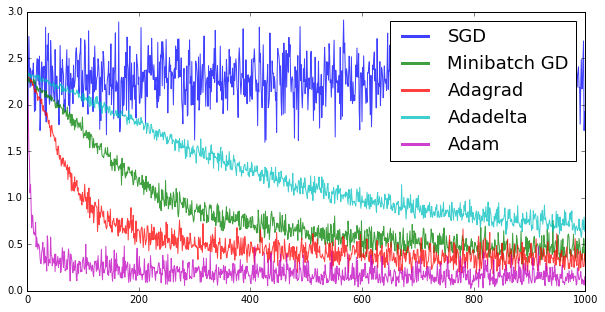

In [78]:
fig = plt.figure(figsize=(10,5))
plt.plot(np.arange(1000), losses_sgd, alpha=0.75)
plt.plot(np.arange(1000), losses_minibatchgd, alpha=0.75)
plt.plot(np.arange(1000), losses_adagrad, alpha=0.75)
plt.plot(np.arange(1000), losses_adadelta, alpha=0.75)
plt.plot(np.arange(1000), losses_adam, alpha=0.75)
leg = plt.legend(('SGD', 'Minibatch GD', 'Adagrad', 'Adadelta', 'Adam'), fontsize=18)
for legobj in leg.legendHandles:
    legobj.set_linewidth(4)
plt.show()